### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

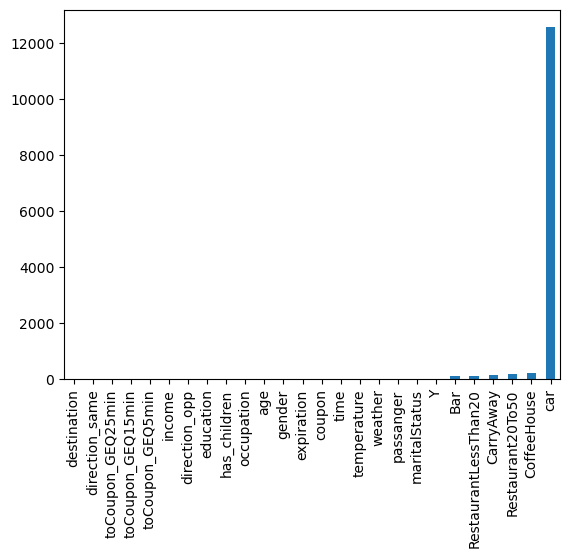

In [13]:
data.info()
data.isnull().sum().sort_values().plot(kind = "bar")
plt.show()

(array([22.,  0., 21.,  0.,  0., 22.,  0., 22.,  0., 21.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

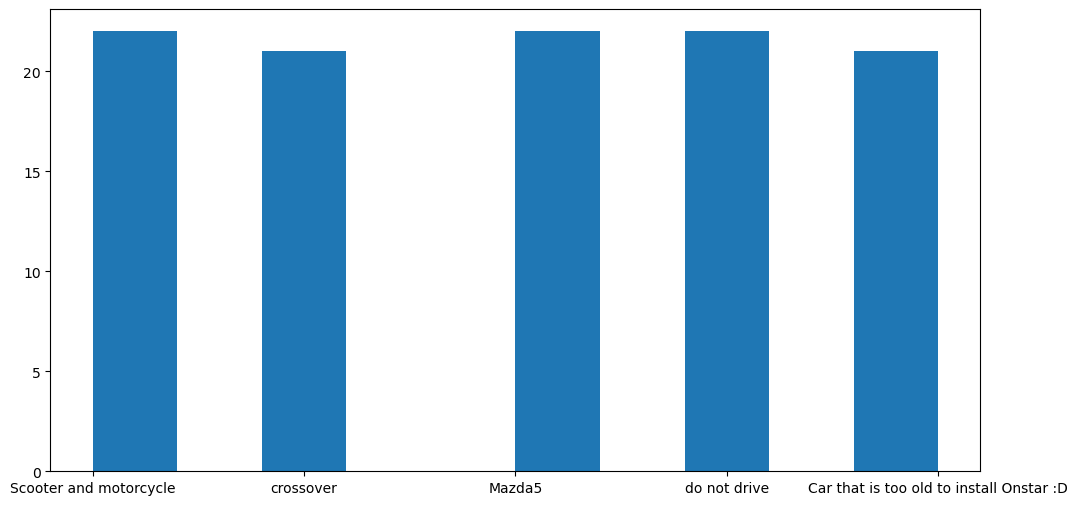

In [113]:
# Column 'car' has a lot of null values. Examine rest of the values in 'car' to see if it's worth keeping.
a = data.dropna()['car']
plt.figure(figsize=(12, 6))
plt.hist(a)
# The data does not seem interesting or large enough to have any meaningful correlation.

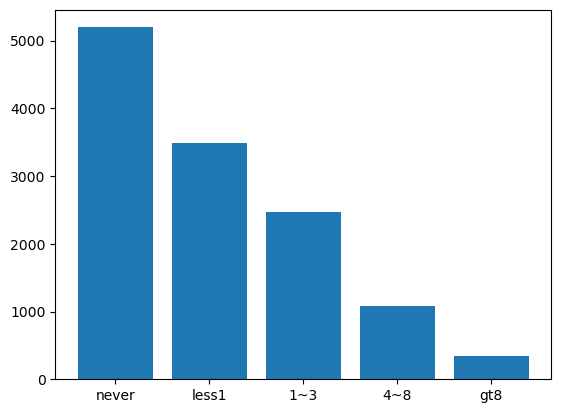

Bar
False    12577
True       107
Name: count, dtype: int64
0    never
Name: Bar, dtype: object


In [101]:
# Column 'Bar' has some null values. Examine 'Bar'
b = data['Bar'].value_counts()
plt.bar(b.index, b.values)
plt.show()
print(data.isnull()['Bar'].value_counts())
print(data['Bar'].mode())

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


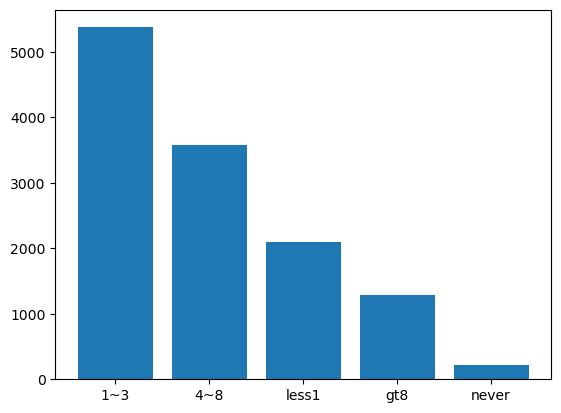

RestaurantLessThan20
False    12554
True       130
Name: count, dtype: int64
0    1~3
Name: RestaurantLessThan20, dtype: object


In [93]:
# Column 'RestaurantLessThan20' has some null values. Examine this column.
b = data['RestaurantLessThan20'].value_counts()
plt.bar(b.index, b.values)
plt.show()
print(data['RestaurantLessThan20'].isnull().value_counts())
print(data['RestaurantLessThan20'].mode())

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


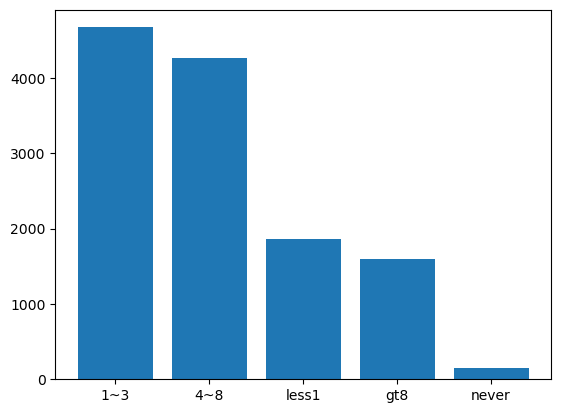

CarryAway
False    12533
True       151
Name: count, dtype: int64
0    1~3
Name: CarryAway, dtype: object


In [91]:
# Examine column 'CarryAway'
b = data['CarryAway'].value_counts()
plt.bar(b.index, b.values)
plt.show()
print(data['CarryAway'].isnull().value_counts())
print(data['CarryAway'].mode())

3. Decide what to do about your missing data -- drop, replace, other...

In [117]:
# The 'car' column does not have meaningful data. Drop the 'car' column
data2 = data.drop(columns = ['car'])
# For columns 'Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse' there are around 1% null values.
# Replace the null values with the mode() for each of these columns.
cols_to_fill = ['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse']
for col in cols_to_fill:
    data2[col] = data2[col].fillna(data2[col].mode()[0])
    print(data2[col].isnull().value_counts())


Bar
False    12684
Name: count, dtype: int64
RestaurantLessThan20
False    12684
Name: count, dtype: int64
CarryAway
False    12684
Name: count, dtype: int64
Restaurant20To50
False    12684
Name: count, dtype: int64
CoffeeHouse
False    12684
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [185]:
accepted = data2['Y'].sum()
total = data2['Y'].value_counts().sum()
proportion = (accepted / total ) * 100
print(f"{proportion} %")


56.84326710816777 %


5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


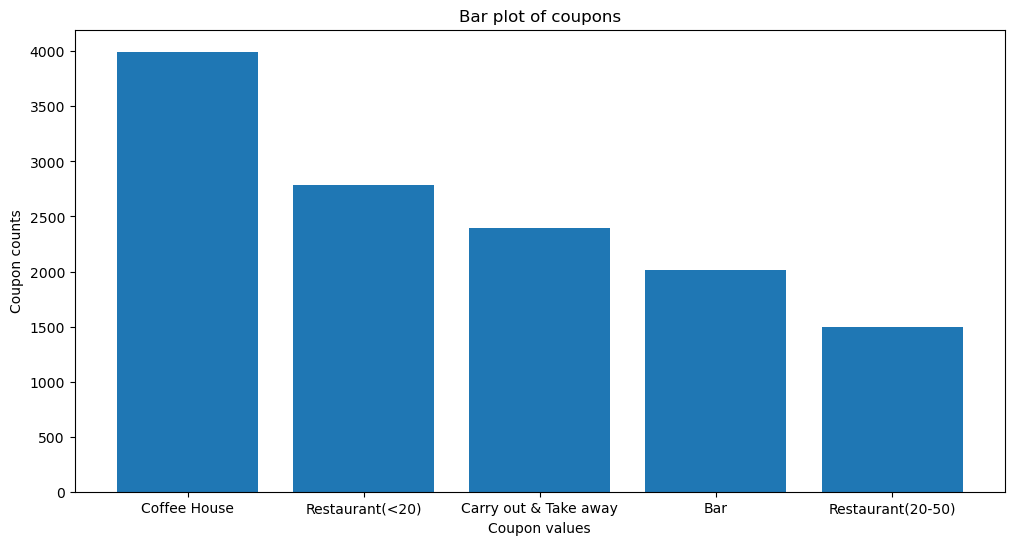

In [149]:
value_counts = data2['coupon'].value_counts()
print(value_counts)
plt.figure(figsize = (12, 6))
plt.bar(value_counts.index, value_counts.values)
plt.title("Bar plot of coupons")
plt.xlabel("Coupon values")
plt.ylabel("Coupon counts")
plt.show()

6. Use a histogram to visualize the temperature column.

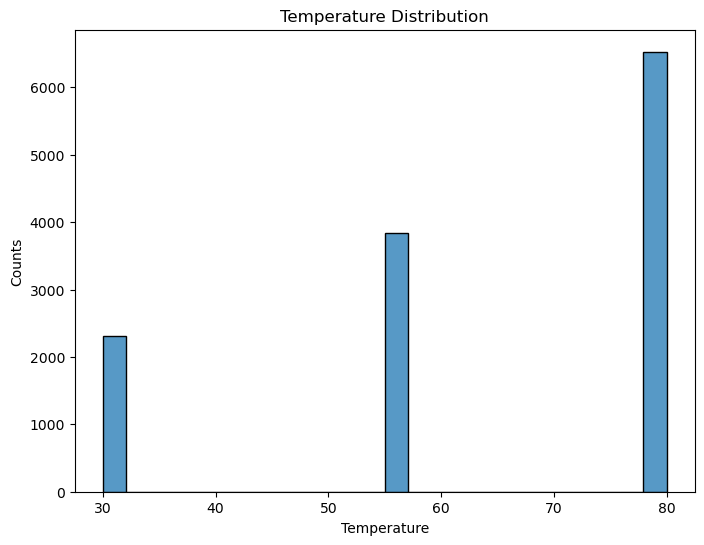

In [169]:
#data2['temperature'].plot(kind = 'hist')
plt.figure(figsize = (8, 6))
sns.histplot(data2['temperature'])
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Counts")
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [175]:
data3 = data2.loc[data2['coupon'] == "Bar"]
data3.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [183]:
accepted = data3['Y'].sum()
total = data3['Y'].value_counts().sum()
proportion = (accepted / total) * 100
print(f"{proportion} %")

41.00148735746158 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [292]:
print(data3['Bar'].value_counts())
bar_values_a = ['1~3', 'less1']
three_or_less_accepted = data3.loc[data3['Bar'].isin(bar_values_a)]['Y'].sum()
three_or_less_total = data3.loc[data3['Bar'].isin(bar_values_a)]['Y'].value_counts().sum()
acceptance_rate_a = three_or_less_accepted / three_or_less_total
print(acceptance_rate_a)
bar_values_b = ['4~8', 'gt8']
more_than_three_accepted = data3.loc[data3['Bar'].isin(bar_values_b)]['Y'].sum()
more_than_three_total = data3.loc[data3['Bar'].isin(bar_values_b)]['Y'].value_counts().sum()
acceptance_rate_b = more_than_three_accepted / more_than_three_total
print(acceptance_rate_b)
# Conclusion : Those who went to a bar 3 or fewer times a month are much less likely to
# accept a bar coupon than those who went more

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
0.5274043433298863
0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [351]:
# Convert age into integer
print(data3['age'].value_counts())
# Convert 50plus into 51 and below21 into 20
data3.loc[:, 'age'] = data3['age'].replace('50plus', '51')
data3.loc[:, 'age'] = data3['age'].replace('below21', '20')
print(data3['age'].value_counts())
data3.loc[:, 'age'] = pd.to_numeric(data3['age'])

age
21    417
26    395
31    339
51    283
36    209
41    178
46    109
20     87
Name: count, dtype: int64
age
21    417
26    395
31    339
51    283
36    209
41    178
46    109
20     87
Name: count, dtype: int64


In [280]:
bar_values = ['1~3', '4~8', 'gt8']
more_than_once_over_25 = data3.loc[(data3['Bar'].isin(bar_values)) & (data3['age'] > 25)]['Y']
more_than_once_over_25_accepted = more_than_once_over_25.sum()
more_than_once_over_25_total = more_than_once_over_25.value_counts().sum()
print(f"{(more_than_once_over_25_accepted / more_than_once_over_25_total) * 100} %")
all_others_accepted = data3['Y'].sum() - more_than_once_over_25_accepted
all_others_total = data3['Y'].value_counts().sum() - more_than_once_over_25_total
print(f"{(all_others_accepted / all_others_total) * 100} %")
# Conclusion: The acceptance rate of drivers who go to a bar more than once a month and are
# above 25 is more than twice compared to all others.

69.52380952380952 %
33.500313087038194 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [308]:
bar_values = ['1~3', '4~8', 'gt8']
disallowed_passanger_values = ['Kid(s)']
disallowed_occupation_values = ['Farming Fishing & Forestry']
selected_drivers = data3.loc[(data3['Bar'].isin(bar_values)) &
                             (~data3['passanger'].isin(disallowed_passanger_values)) &
                             (~data3['occupation'].isin(disallowed_occupation_values))]['Y']
selected_drivers_accepted = selected_drivers.sum()
selected_drivers_total = selected_drivers.value_counts().sum()
print(f"{(selected_drivers_accepted / selected_drivers_total) * 100} %")
all_others_accepted = data3['Y'].sum() - selected_drivers_accepted
all_others_total = data3['Y'].value_counts().sum() - selected_drivers_total
print(f"{(all_others_accepted / all_others_total) * 100} %")
# Conclusion: the acceptance rate between drivers who go to bars more than once a month and
# had passengers that were not a kid and had occupations other than farming, fishing, or forestry
# is much higher than all others.

71.32486388384754 %
29.6043656207367 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [314]:
print(data3['maritalStatus'].value_counts())
print(data3['RestaurantLessThan20'].value_counts())
print(data3['income'].value_counts())

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64
RestaurantLessThan20
1~3      901
4~8      568
less1    325
gt8      186
never     37
Name: count, dtype: int64
income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64


In [318]:
bar_values = ['1~3', '4~8', 'gt8']
disallowed_passanger_values = ['Kid(s)']
disallowed_marital_status = ['Widowed']
cheap_restaurant_values = ['4~8', 'gt8']
income_values = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']
selected_drivers = data3.loc[
                        ((data3['Bar'].isin(bar_values)) &
                         (~data3['passanger'].isin(disallowed_passanger_values)) &
                         (~data3['maritalStatus'].isin(disallowed_marital_status))) |
                        ((data3['Bar'].isin(bar_values)) &
                         (data3['age'] < 30)) |
                        ((data3['RestaurantLessThan20'].isin(cheap_restaurant_values)) &
                         (data3['income'].isin(income_values)))]['Y']

selected_drivers_accepted = selected_drivers.sum()
selected_drivers_total = selected_drivers.value_counts().sum()
print(f"{(selected_drivers_accepted / selected_drivers_total) * 100} %")
all_others_accepted = data3['Y'].sum() - selected_drivers_accepted
all_others_total = data3['Y'].value_counts().sum() - selected_drivers_total
print(f"{(all_others_accepted / all_others_total) * 100} %")
# Conclusion: the acceptance rate between these drivers who match the above conditions
# is much higher than all others.

58.891752577319586 %
29.814665592264305 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Hypothesis: Drivers who are more likely to accept bar coupons:
# 1. Visit bars more often
# 2. Don't have kids as passengers
# 3. Have relatively low income (less than $50,000)
# 4. Visit cheaper restaurants more often

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [340]:
# Create a new DataFrame that contains just the Coffee House coupons.
data4 = data2.loc[data2['coupon'] == "Coffee House"]
data4.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [326]:
# What proportion of coffee house coupons were accepted?
accepted = data4['Y'].sum()
total = data4['Y'].value_counts().sum()
proportion = (accepted / total) * 100
print(f"{proportion} %")

49.92492492492492 %


In [332]:
# Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.
print(data4['CoffeeHouse'].value_counts())
ch_values_a = ['1~3', 'less1']
three_or_less_accepted = data4.loc[data4['CoffeeHouse'].isin(ch_values_a)]['Y'].sum()
three_or_less_total = data4.loc[data4['CoffeeHouse'].isin(ch_values_a)]['Y'].value_counts().sum()
acceptance_rate_a = three_or_less_accepted / three_or_less_total
print(acceptance_rate_a)
ch_values_b = ['4~8', 'gt8']
more_than_three_accepted = data4.loc[data4['CoffeeHouse'].isin(ch_values_b)]['Y'].sum()
more_than_three_total = data4.loc[data4['CoffeeHouse'].isin(ch_values_b)]['Y'].value_counts().sum()
acceptance_rate_b = more_than_three_accepted / more_than_three_total
print(acceptance_rate_b)
# Conclusion : Those who went to a coffee house 3 or fewer times a month are less likely to
# accept a coffee house coupon than those who went more

CoffeeHouse
less1    1147
1~3      1042
never     927
4~8       538
gt8       342
Name: count, dtype: int64
0.5600730927364094
0.675


In [348]:
# Compare the acceptance rate between drivers who go to a coffee house one or more times a month and are over the age of 25 to the all others.
# Convert age into integer
print(data4['age'].value_counts())
# Convert 50plus into 51 and below21 into 20
data4.loc[:, 'age'] = data4['age'].replace('50plus', '51')
data4.loc[:, 'age'] = data4['age'].replace('below21', '20')
print(data4['age'].value_counts())
data4.loc[:, 'age'] = pd.to_numeric(data4['age'])

age
21    883
26    843
31    623
51    545
36    402
41    325
46    220
20    155
Name: count, dtype: int64
age
21    883
26    843
31    623
51    545
36    402
41    325
46    220
20    155
Name: count, dtype: int64


In [355]:
# Now do the comparison
ch_values = ['1~3', '4~8', 'gt8']
more_than_once_over_25 = data4.loc[(data4['CoffeeHouse'].isin(ch_values)) & (data4['age'] > 25)]['Y']
more_than_once_over_25_accepted = more_than_once_over_25.sum()
more_than_once_over_25_total = more_than_once_over_25.value_counts().sum()
print(f"{(more_than_once_over_25_accepted / more_than_once_over_25_total) * 100} %")
all_others_accepted = data4['Y'].sum() - more_than_once_over_25_accepted
all_others_total = data4['Y'].value_counts().sum() - more_than_once_over_25_total
print(f"{(all_others_accepted / all_others_total) * 100} %")
# Conclusion: The acceptance rate of drivers who go to a coffee house one or more times a month and are
# above 25 is more than all others.

63.84388807069219 %
42.75966641394996 %


In [361]:
# compare the acceptance rate between drivers who go to bars one or more times a month and
# have kids as passanger
ch_values = ['1~3', '4~8', 'gt8']
passanger_values = ['Kid(s)']
selected_drivers = data4.loc[(data4['CoffeeHouse'].isin(ch_values)) &
                             (data4['passanger'].isin(passanger_values))]['Y']
selected_drivers_accepted = selected_drivers.sum()
selected_drivers_total = selected_drivers.value_counts().sum()
print(f"{(selected_drivers_accepted / selected_drivers_total) * 100} %")
all_others_accepted = data4['Y'].sum() - selected_drivers_accepted
all_others_total = data4['Y'].value_counts().sum() - selected_drivers_total
print(f"{(all_others_accepted / all_others_total) * 100} %")

65.13761467889908 %
49.49832775919732 %


In [ ]:
# Compare the acceptance rates between those drivers who:
# go to coffee house more than once a month, had passengers that were a kid, and were not widowed OR
# go to coffee house more than once a month and are under the age of 30 and income is less than $50,000

In [365]:
ch_values = ['1~3', '4~8', 'gt8']
passanger_values = ['Kid(s)']
disallowed_marital_status = ['Widowed']
income_values = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']
selected_drivers_1 = data4.loc[
                        ((data4['CoffeeHouse'].isin(ch_values)) &
                         (data4['passanger'].isin(passanger_values)) &
                         (~data4['maritalStatus'].isin(disallowed_marital_status)))]['Y']
                        
selected_drivers_2 = data4.loc[
                        ((data4['CoffeeHouse'].isin(ch_values)) &
                         (data4['age'] < 30)  &
                         (data4['income'].isin(income_values)))]['Y']

selected_drivers_1_accepted = selected_drivers_1.sum()
selected_drivers_1_total = selected_drivers_1.value_counts().sum()
print(f"{(selected_drivers_1_accepted / selected_drivers_1_total) * 100} %")
selected_drivers_2_accepted = selected_drivers_2.sum()
selected_drivers_2_total = selected_drivers_2.value_counts().sum()
print(f"{(selected_drivers_2_accepted / selected_drivers_2_total) * 100} %")
all_others_accepted = data3['Y'].sum() - selected_drivers_1_accepted - selected_drivers_2_accepted
all_others_total = data3['Y'].value_counts().sum() - selected_drivers_1_total - selected_drivers_2_total
print(f"{(all_others_accepted / all_others_total) * 100} %")
# Conclusion: the acceptance rate between these drivers who match the above conditions
# is much higher than all others.

65.13761467889908 %
68.37455830388693 %
27.496274217585693 %


In [ ]:
# Conclusion: Drivers who are more likely to accept coffee house coupons
# 1. Visit a coffee house one or more times per month
# 2. Have kids as passanger
# 3. Have relatively lower income
# 4. Are below the age of 30